
# Reconhecimento de dígitos manuscritos

Este exemplo demonstra como o scikit-learn pode ser usado para reconhecer imagens de 
dígitos manuscritos, de 0 a 9.


In [1]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Importações padrão do Python científico
import matplotlib.pyplot as plt
import numpy as np

# Importar conjuntos de dados, classificadores e métricas de desempenho
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

# Importar biblioteca para salvar objetos em python 
import pickle  


## Conjunto de dados de Dígitos

O conjunto de dados de dígitos consiste em imagens de dígitos de 8x8
pixels. O atributo "images" do conjunto de dados armazena
matrizes de 8x8 com valores de escala de cinza para cada imagem. Usaremos essas matrizes para
visualizar as 4 primeiras imagens. O atributo "target" do conjunto de dados armazena
o dígito que cada imagem representa, e isso está incluído no título das 4
gráficos abaixo.

Observação: se estivéssemos trabalhando com arquivos de imagem (por exemplo, arquivos 'png'), os carregaríamos usando a função `matplotlib.pyplot.imread`.


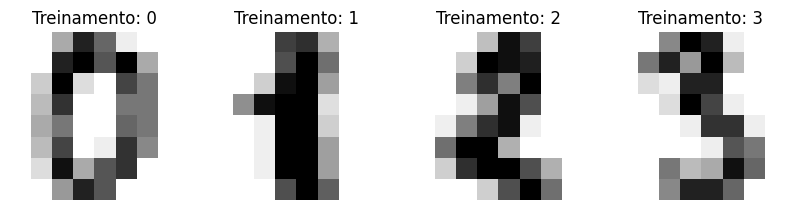

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Treinamento: %i" % label)

## Classificação

Para aplicar um classificador a esses dados, precisamos achatar as imagens, transformando
cada matriz 2-D de valores de escala de cinza com forma (8, 8) em forma
(64,). Posteriormente, todo o conjunto de dados terá a forma
(n_amostras, n_características), onde n_amostras é o número de imagens e
n_características é o número total de pixels em cada imagem.

Podemos, em seguida, dividir os dados em subconjuntos de treinamento e teste e ajustar um classificador de vetor de suporte
nos exemplos de treinamento. O classificador ajustado pode
subsequentemente ser usado para prever o valor do dígito para as amostras
no subconjunto de teste.

In [3]:
# Achatar as imagens
n_amostras = len(digits.images)
dados = digits.images.reshape((n_amostras, -1))

# Criar um classificador: um classificador de rede neural
clf = MLPClassifier(solver='adam', hidden_layer_sizes=2, alpha=1e-04)

# Dividir os dados em 50% de subconjuntos de treinamento e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(
    dados, digits.target, test_size=0.5, shuffle=False
)

# Aprender os dígitos no subconjunto de treinamento
clf.fit(X_treino, y_treino)

# Prever o valor do dígito no subconjunto de teste
previsto = clf.predict(X_teste)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Abaixo, visualizamos as 4 primeiras amostras de teste e mostramos seu valor de dígito previsto no título.


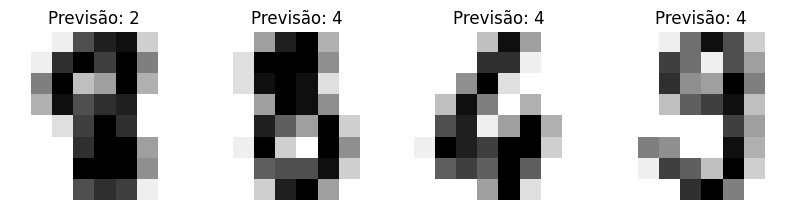

In [4]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, imagem, previsao in zip(axes, X_teste, previsto):
    ax.set_axis_off()
    imagem = imagem.reshape(8, 8)
    ax.imshow(imagem, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Previsão: {previsao}")

A função `sklearn.metrics.classification_report` cria um relatório de texto mostrando
as principais métricas de classificação.

In [5]:
print(
    f"Relatório de classificação para o classificador {clf}:\n"
    f"{metrics.classification_report(y_teste, previsto)}\n"
)


Relatório de classificação para o classificador MLPClassifier(hidden_layer_sizes=2):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        88
           1       0.76      0.71      0.73        91
           2       0.70      0.78      0.74        86
           3       0.53      0.57      0.55        91
           4       0.29      0.88      0.44        92
           5       0.37      0.42      0.39        91
           6       0.00      0.00      0.00        91
           7       0.54      0.61      0.57        89
           8       0.40      0.16      0.23        88
           9       0.52      0.58      0.55        92

    accuracy                           0.47       899
   macro avg       0.41      0.47      0.42       899
weighted avg       0.41      0.47      0.42       899




/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Também podemos plotar uma `matriz de confusão` dos
valores reais e dos valores de dígito previstos.

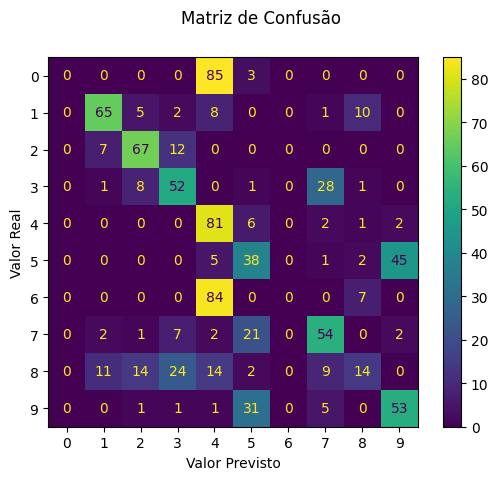

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_teste, previsto)
disp.figure_.suptitle("Matriz de Confusão")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()

## Grid-search

Dada a complexidade dos modelos, nem sempre os hiperparâmetros escolhidos vão resultar na melhor performance do modelo. Portanto, para adaptar o modelo a base de dados estudada é necessário testar combinações diferentes com o intuito de alcançar o melhor resultado possível. Para tal, podemos utilizar a função `sklearn.model_selection.GridSearchCV`. Vale ressaltar que a busca de hiperparâmetros é um problema de otimização e pode ser resolvido com outras técnicas como os `algoritmos genéticos`.

In [7]:
# Função utilitária para relatar os melhores resultados
def relatar_resultados(resultados, n_top=3):
    for i in range(1, n_top + 1):
        candidatos = np.flatnonzero(resultados["rank_test_score"] == i)
        for candidato in candidatos:
            print("Modelo com classificação: {0}".format(i))
            print(
                "Média da pontuação de validação: {0:.3f} (desvio padrão: {1:.3f})".format(
                    resultados["mean_test_score"][candidato],
                    resultados["std_test_score"][candidato],
                )
            )
            print("Parâmetros: {0}".format(resultados["params"][candidato]))
            print("")

In [8]:
# Este é um dicionário que especifica os hiperparâmetros a serem ajustados durante a busca em grade
param_grid = {
    "hidden_layer_sizes": [
        2,
        (2, 2),
        100,
        (100, 100),
        350,
        (350, 350),
    ],
    "alpha": [1e-04, 1e-05],
}

#  É um objeto da classe GridSearchCV, que é usado para realizar a busca em grade. Ele leva como argumento 
# o classificador (clf), o dicionário param_grid com os hiperparâmetros a serem otimizados e n_jobs, 
# que indica o número de núcleos da CPU a serem usados para processamento paralelo.

grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    n_jobs=6,
)

# Prever o valor do dígito no subconjunto de teste
previsto = clf.predict(X_teste)


grid_search.fit(X_treino, y_treino)

relatar_resultados(grid_search.cv_results_)

/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Modelo com classificação: 1
Média da pontuação de validação: 0.931 (desvio padrão: 0.030)
Parâmetros: {'alpha': 1e-05, 'hidden_layer_sizes': 350}

Modelo com classificação: 2
Média da pontuação de validação: 0.929 (desvio padrão: 0.034)
Parâmetros: {'alpha': 1e-05, 'hidden_layer_sizes': (350, 350)}

Modelo com classificação: 3
Média da pontuação de validação: 0.924 (desvio padrão: 0.032)
Parâmetros: {'alpha': 1e-05, 'hidden_layer_sizes': (100, 100)}



Uma vez determinados os hiperparâmetros ótimos, reconstruimos o classificador e rodamos novamente a validação

Relatório de classificação para o classificador MLPClassifier(hidden_layer_sizes=(350, 350)):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        88
           1       0.94      0.89      0.92        91
           2       0.99      0.97      0.98        86
           3       0.95      0.85      0.90        91
           4       0.99      0.95      0.97        92
           5       0.88      0.97      0.92        91
           6       0.96      0.99      0.97        91
           7       0.96      0.99      0.97        89
           8       0.90      0.91      0.90        88
           9       0.89      0.96      0.92        92

    accuracy                           0.94       899
   macro avg       0.95      0.94      0.94       899
weighted avg       0.94      0.94      0.94       899




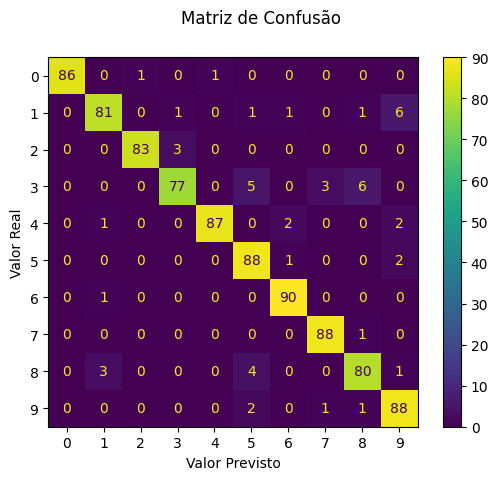

In [9]:
best_clf = MLPClassifier(solver='adam',hidden_layer_sizes=(350,350), alpha=1e-04)

# Aprender os dígitos no subconjunto de treinamento
best_clf.fit(X_treino, y_treino)

# Prever o valor do dígito no subconjunto de teste
previsto = best_clf.predict(X_teste)

# Mostra o relatório de classificação
print(
    f"Relatório de classificação para o classificador {best_clf}:\n"
    f"{metrics.classification_report(y_teste, previsto)}\n"
)

# Plota a matriz de confusão
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_teste, previsto)
disp.figure_.suptitle("Matriz de Confusão")
plt.xlabel("Valor Previsto")
plt.ylabel("Valor Real")
plt.show()

## Salvando modelo

Com o intuito de usar esse modelo na API, podemos salvar o objeto para ser importado posteriormente

In [10]:
with open("app/modelos_treinados/modelo.pkl", "wb") as f:
    pickle.dump(best_clf, f)

## Salvando valores de pixel para teste

In [11]:
np.savetxt("digito_{:d}.txt".format(y_teste[8]), X_teste[8].reshape(1,-1), delimiter=",",fmt='%f')